In [1]:
import pandas as pd

# Forecasting
Se pueden utilizar los datos del pasado para predecir los datos del futuro. Uno de los mejores métodos para la predicción, es la **regresión lineal**.

Vamos a utilizar los datos de un modelo de negocios estandard: compra y venta de vehículos a bajo precio y su reventa a mayor precio.

## Cleaning the data
Vamos a cargar el dataset.

In [9]:
carsales = pd.read_csv('d:\\cursos\\data_science\\data\\carsales.csv')
carsales.head()

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01,6550.0
1,1960-02,8728.0
2,1960-03,12026.0
3,1960-04,14395.0
4,1960-05,14587.0


Vamos a ajustar algunos aspectos del dataset para un mejor desempeño.

In [13]:
carsales.columns = ['month', 'sales']
carsales.tail()

,month,sales
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0
108,Monthly car sales in Quebec 1960-1968,NaN


Removemos la última fila que no contiene datos.

In [16]:
carsales = carsales.loc[0:107, :].copy()
carsales.tail()

,month,sales
103,1968-08,16722.0
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0


Otro aspecto a destacar es el formato de fechas. En los datasets los formatos de fechas suelen ser problemáticos, puesto que pueden estar en formatos distintos del numérico, además pueden no seguir la lógica de una fecha (para los meses 12 + 1 = 1). 

In [17]:
carsales['period'] = list(range(108))
carsales.head()

,month,sales,period
0,1960-01,6550.0,0
1,1960-02,8728.0,1
2,1960-03,12026.0,2
3,1960-04,14395.0,3
4,1960-05,14587.0,4


## Plotting data to find trends
Es buena práctica *visualizar* los datos pronto para encontrar patrones.

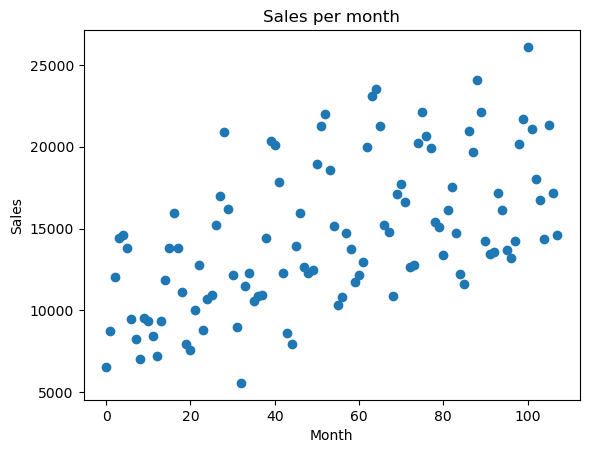

In [18]:
import matplotlib.pyplot as plt
plt.scatter(carsales['period'], carsales['sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales per month')
plt.show()

## Regresión lineal
La regresión lineal es una técnica para poner orden en el caos. A veces se denomina la línea de mejor encaje, debido a que representa una línea en la que ningún dato está particularmente alejado de la línea.